In [1]:
%matplotlib notebook
%pylab inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scanpy as sc
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage


mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['axes.grid'] = False

Populating the interactive namespace from numpy and matplotlib


In [4]:
pathToCounts = './counts.h5ad'
pathToCellData = './cell_annotation.csv'

In [39]:
counts = sc.read(pathToCounts)
metadata = pd.read_csv(pathToCellData,index_col = 0)
counts.obs = metadata.loc[counts.obs.index,:]

C:\Users\mengz\.conda\envs\test\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [40]:
countsDF = pd.DataFrame(counts.X, index = counts.obs.index.values, columns = counts.var.index.values)
countsDF['label'] = counts.obs['label']

In [42]:
countsMean = countsDF.groupby('label').mean()
countsMeanZ = pd.DataFrame(preprocessing.scale(countsMean), index = countsMean.index, columns = countsMean.columns)

In [45]:
Z = linkage(countsMeanZ, 'ward')

In [47]:
groups = counts.obs.loc[:,['subclass','label']].groupby(['subclass','label'])
groupDict = dict()
for k,v in groups:
    groupDict[k[1]] = k[0]
# class_label_colors = {'Other':'y', 'Glutamatergic':'m', 'GABAergic':'c'}


In [3]:
cmap_subclass = {'L2/3 IT': '#ffda11',
 'L4/5 IT': '#f68d45',
 'L5 IT': '#f05a9e',
 'L6 IT': '#99017b',
 'L6 IT Car3': '#2a0593',
 'L5 ET': '#2ad5ff',
 'L5/6 NP': '#6d92ff',
 'L6 CT': '#8976ff',
 'L6b': '#e01fff',
 'Lamp5': '#aad466',
 'Sncg': '#2a9466',
 'Vip': '#0092b6',
 'Sst': '#c8b866',
 'Pvalb': '#c68b84', 
    'Astro':'#d490c6',
       'Endo':'#bc7967',
       'PVM':'#04F757',
       'Micro':'#00a8d0',
      'OPC':'#1470d6',
       'Oligo':'#5e45a6',
       'Peri':'#185b48',
      'SMC':'#3c7632',
       'VLMC':'#7e7a36'
       }

In [48]:
# Color mapping
dflt_col = "k"   # Unclustered gray
D_leaf_colors = dict(zip(countsMeanZ.index, [[cmap_subclass[groupDict[x]]] for x in countsMeanZ.index]))
numToType = dict(zip(range(len(countsMeanZ.index.values)), countsMeanZ.index.values))
# notes:
# * rows in Z correspond to "inverted U" links that connect clusters
# * rows are ordered by increasing distance
# * if the colors of the connected clusters match, use that color for link
link_cols = {}
for i, i12 in enumerate(Z[:,:2].astype(int)):
  c1, c2 = (link_cols[x] if x > len(Z) else D_leaf_colors[numToType[x]][0]
    for x in i12)
  link_cols[i+1+len(Z)] = c1 if c1 == c2 else dflt_col

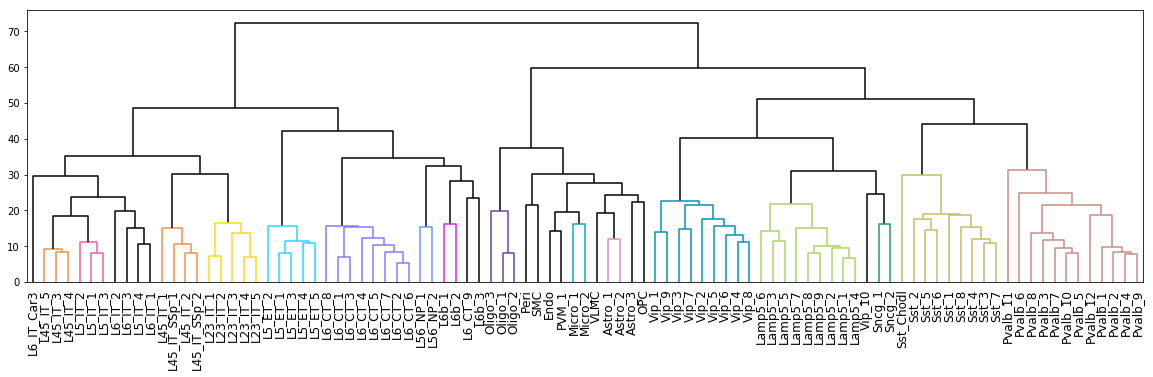

In [51]:
# Color mapping
dflt_col = "k"   # Unclustered gray
D_leaf_colors = dict(zip(countsMeanZ.index, [[cmap_subclass[groupDict[x]]] for x in countsMeanZ.index]))
numToType = dict(zip(range(len(countsMeanZ.index.values)), countsMeanZ.index.values))
# notes:
# * rows in Z correspond to "inverted U" links that connect clusters
# * rows are ordered by increasing distance
# * if the colors of the connected clusters match, use that color for link
link_cols = {}
for i, i12 in enumerate(Z[:,:2].astype(int)):
  c1, c2 = (link_cols[x] if x > len(Z) else D_leaf_colors[numToType[x]][0]
    for x in i12)
  link_cols[i+1+len(Z)] = c1 if c1 == c2 else dflt_col

# Dendrogram
f,axs = plt.subplots(1,1,figsize = (20,5))
D = dendrogram(Z=Z, labels=countsMeanZ.index, color_threshold=None,
  leaf_font_size=12, leaf_rotation=90, link_color_func=lambda x: link_cols[x])
f.savefig('C:/Users/mengz/Dropbox/M1_paper/flagship/revision/dend_sns.pdf',dpi = 300, bbox_inches = 'tight', transparent=False)